In [2]:
from scripts.dataloaders import dataloader
from scripts.training import trainmodels, save
from scripts.cnn import myNet

from torchvision import models
import torch.nn as nn

To see the effects of $\text{learning rate}$ change the it to 0.01.

In [3]:
train_dir = '/Users/Zjxi/Desktop/AI_Proj/archive/train'
valid_dir = '/Users/Zjxi/Desktop/AI_Proj/archive/valid'
test_dir = '/Users/Zjxi/Desktop/AI_Proj/archive/test'
train_loader, valid_loader, test_loader \
    = dataloader(train_dir=train_dir, valid_dir=valid_dir, test_dir=test_dir, augment=False, img_size=224, batch_size=64)

##### CNN

In [3]:
mynet = myNet(num_classes=100)

# train a simple CNN, myNet
losses_train_mynet, accus_train_mynet, losses_valid_mynet, accus_valid_mynet, runtime_mynet \
    = trainmodels(train_loader, valid_loader, model=mynet, learning_rate=0.01, num_epochs=15)     

100%|██████████| 197/197 [08:54<00:00,  2.71s/it]


Epoch 0 of 15
Training loss: 18.0093, accuracy: 0.0146


100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


Validation loss: 4.6122, accuracy: 0.0100



100%|██████████| 197/197 [09:16<00:00,  2.82s/it]


Epoch 1 of 15
Training loss: 4.6033, accuracy: 0.0137


100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Validation loss: 4.6135, accuracy: 0.0100



100%|██████████| 197/197 [10:19<00:00,  3.14s/it]


Epoch 2 of 15
Training loss: 4.6030, accuracy: 0.0151


100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


Validation loss: 4.6136, accuracy: 0.0100



100%|██████████| 197/197 [11:40<00:00,  3.55s/it]


Epoch 3 of 15
Training loss: 4.6028, accuracy: 0.0137


100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


Validation loss: 4.6141, accuracy: 0.0100



100%|██████████| 197/197 [11:46<00:00,  3.58s/it]


Epoch 4 of 15
Training loss: 4.6031, accuracy: 0.0137


100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


Validation loss: 4.6141, accuracy: 0.0100



100%|██████████| 197/197 [11:54<00:00,  3.63s/it]


Epoch 5 of 15
Training loss: 4.6029, accuracy: 0.0144


100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


Validation loss: 4.6150, accuracy: 0.0100



100%|██████████| 197/197 [09:47<00:00,  2.98s/it]


Epoch 6 of 15
Training loss: 4.6027, accuracy: 0.0148


100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


Validation loss: 4.6147, accuracy: 0.0100



100%|██████████| 197/197 [10:48<00:00,  3.29s/it]


Epoch 7 of 15
Training loss: 4.6030, accuracy: 0.0140


100%|██████████| 8/8 [00:06<00:00,  1.19it/s]


Validation loss: 4.6146, accuracy: 0.0100



100%|██████████| 197/197 [11:29<00:00,  3.50s/it]


Epoch 8 of 15
Training loss: 4.6030, accuracy: 0.0142


100%|██████████| 8/8 [00:06<00:00,  1.30it/s]


Validation loss: 4.6142, accuracy: 0.0100



100%|██████████| 197/197 [09:45<00:00,  2.97s/it]


Epoch 9 of 15
Training loss: 4.6032, accuracy: 0.0148


100%|██████████| 8/8 [00:05<00:00,  1.38it/s]


Validation loss: 4.6148, accuracy: 0.0100



100%|██████████| 197/197 [11:26<00:00,  3.49s/it]


Epoch 10 of 15
Training loss: 4.6031, accuracy: 0.0145


100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


Validation loss: 4.6141, accuracy: 0.0100



100%|██████████| 197/197 [11:33<00:00,  3.52s/it]


Epoch 11 of 15
Training loss: 4.6031, accuracy: 0.0142


100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


Validation loss: 4.6145, accuracy: 0.0100



100%|██████████| 197/197 [11:33<00:00,  3.52s/it]


Epoch 12 of 15
Training loss: 4.6030, accuracy: 0.0148


100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


Validation loss: 4.6144, accuracy: 0.0100



100%|██████████| 197/197 [11:33<00:00,  3.52s/it]


Epoch 13 of 15
Training loss: 4.6030, accuracy: 0.0139


100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


Validation loss: 4.6142, accuracy: 0.0100



100%|██████████| 197/197 [11:38<00:00,  3.55s/it]


Epoch 14 of 15
Training loss: 4.6029, accuracy: 0.0148


100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


Validation loss: 4.6145, accuracy: 0.0100



##### CNN (3 layers)

In [4]:
mynet = myNet(num_classes=100)

# train a simple CNN (myNet)
results = trainmodels(train_loader, valid_loader, model=mynet, learning_rate=0.01, num_epochs=15)

# save the results
save(results, 'mynet_3_layers')

100%|██████████| 197/197 [06:25<00:00,  1.96s/it]


Epoch 0 of 15
Training loss: 10.6263, accuracy: 0.0133


100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Validation loss: 4.6109, accuracy: 0.0100



100%|██████████| 197/197 [07:02<00:00,  2.14s/it]


Epoch 1 of 15
Training loss: 4.6033, accuracy: 0.0148


100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


Validation loss: 4.6135, accuracy: 0.0100



100%|██████████| 197/197 [07:02<00:00,  2.14s/it]


Epoch 2 of 15
Training loss: 4.6027, accuracy: 0.0143


100%|██████████| 8/8 [00:05<00:00,  1.37it/s]


Validation loss: 4.6139, accuracy: 0.0100



100%|██████████| 197/197 [06:55<00:00,  2.11s/it]


Epoch 3 of 15
Training loss: 4.6029, accuracy: 0.0139


100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


Validation loss: 4.6144, accuracy: 0.0100



100%|██████████| 197/197 [07:08<00:00,  2.18s/it]


Epoch 4 of 15
Training loss: 4.6029, accuracy: 0.0128


100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


Validation loss: 4.6140, accuracy: 0.0100



100%|██████████| 197/197 [07:17<00:00,  2.22s/it]


Epoch 5 of 15
Training loss: 4.6028, accuracy: 0.0143


100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


Validation loss: 4.6146, accuracy: 0.0100



100%|██████████| 197/197 [07:08<00:00,  2.17s/it]


Epoch 6 of 15
Training loss: 4.6031, accuracy: 0.0138


100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


Validation loss: 4.6152, accuracy: 0.0100



100%|██████████| 197/197 [07:08<00:00,  2.17s/it]


Epoch 7 of 15
Training loss: 4.6029, accuracy: 0.0146


100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


Validation loss: 4.6133, accuracy: 0.0100



100%|██████████| 197/197 [07:07<00:00,  2.17s/it]


Epoch 8 of 15
Training loss: 4.6028, accuracy: 0.0136


100%|██████████| 8/8 [00:05<00:00,  1.33it/s]


Validation loss: 4.6137, accuracy: 0.0100



100%|██████████| 197/197 [07:07<00:00,  2.17s/it]


Epoch 9 of 15
Training loss: 4.6030, accuracy: 0.0142


100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


Validation loss: 4.6145, accuracy: 0.0100



100%|██████████| 197/197 [07:07<00:00,  2.17s/it]


Epoch 10 of 15
Training loss: 4.6028, accuracy: 0.0148


100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


Validation loss: 4.6136, accuracy: 0.0100



100%|██████████| 197/197 [07:06<00:00,  2.17s/it]


Epoch 11 of 15
Training loss: 4.6033, accuracy: 0.0129


100%|██████████| 8/8 [00:05<00:00,  1.38it/s]


Validation loss: 4.6141, accuracy: 0.0100



100%|██████████| 197/197 [06:58<00:00,  2.13s/it]


Epoch 12 of 15
Training loss: 4.6029, accuracy: 0.0130


100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


Validation loss: 4.6139, accuracy: 0.0100



100%|██████████| 197/197 [07:13<00:00,  2.20s/it]


Epoch 13 of 15
Training loss: 4.6032, accuracy: 0.0148


100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


Validation loss: 4.6144, accuracy: 0.0100



100%|██████████| 197/197 [07:13<00:00,  2.20s/it]


Epoch 14 of 15
Training loss: 4.6027, accuracy: 0.0145


100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


Validation loss: 4.6146, accuracy: 0.0100



##### ResNet18

In [4]:
resnet18 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# replace the fully connected layer so the model outputs 100 classes
resnet18.fc = nn.Linear(resnet18.fc.in_features, 100)  

# freeze all layers 
for param in resnet18.parameters():
    param.requires_grad = False
# unfreeze the last layer
for param in resnet18.fc.parameters():  
    param.requires_grad = True

# train ResNet18
losses_train_resnet, accus_train_resnet, losses_valid_resnet, accus_valid_resnet, runtime_resnet \
    = trainmodels(data_loader_train=train_loader, data_loader_valid=valid_loader, model=resnet18, learning_rate=0.01, num_epochs=15)

100%|██████████| 197/197 [06:05<00:00,  1.86s/it]


Epoch 0 of 15
Training loss: 1.5399, accuracy: 0.6691


100%|██████████| 8/8 [00:13<00:00,  1.72s/it]


Validation loss: 0.7778, accuracy: 0.7980



100%|██████████| 197/197 [05:56<00:00,  1.81s/it]


Epoch 1 of 15
Training loss: 0.5636, accuracy: 0.8525


100%|██████████| 8/8 [00:14<00:00,  1.86s/it]


Validation loss: 0.5569, accuracy: 0.8600



100%|██████████| 197/197 [05:57<00:00,  1.81s/it]


Epoch 2 of 15
Training loss: 0.4053, accuracy: 0.8896


100%|██████████| 8/8 [00:14<00:00,  1.80s/it]


Validation loss: 0.8410, accuracy: 0.8420



100%|██████████| 197/197 [05:58<00:00,  1.82s/it]


Epoch 3 of 15
Training loss: 0.3744, accuracy: 0.9010


100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


Validation loss: 0.7528, accuracy: 0.8460



100%|██████████| 197/197 [05:58<00:00,  1.82s/it]


Epoch 4 of 15
Training loss: 0.2478, accuracy: 0.9304


100%|██████████| 8/8 [00:14<00:00,  1.79s/it]


Validation loss: 0.8671, accuracy: 0.8300



100%|██████████| 197/197 [05:58<00:00,  1.82s/it]


Epoch 5 of 15
Training loss: 0.2615, accuracy: 0.9271


100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


Validation loss: 0.9922, accuracy: 0.8300



100%|██████████| 197/197 [05:56<00:00,  1.81s/it]


Epoch 6 of 15
Training loss: 0.2305, accuracy: 0.9339


100%|██████████| 8/8 [00:14<00:00,  1.78s/it]


Validation loss: 0.7944, accuracy: 0.8560



100%|██████████| 197/197 [05:53<00:00,  1.80s/it]


Epoch 7 of 15
Training loss: 0.1998, accuracy: 0.9445


100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


Validation loss: 0.8097, accuracy: 0.8780



100%|██████████| 197/197 [05:54<00:00,  1.80s/it]


Epoch 8 of 15
Training loss: 0.2016, accuracy: 0.9452


100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


Validation loss: 0.9050, accuracy: 0.8660



100%|██████████| 197/197 [05:53<00:00,  1.79s/it]


Epoch 9 of 15
Training loss: 0.1340, accuracy: 0.9630


100%|██████████| 8/8 [00:13<00:00,  1.75s/it]


Validation loss: 0.7307, accuracy: 0.8860



100%|██████████| 197/197 [05:52<00:00,  1.79s/it]


Epoch 10 of 15
Training loss: 0.1220, accuracy: 0.9654


100%|██████████| 8/8 [00:13<00:00,  1.71s/it]


Validation loss: 0.8611, accuracy: 0.8660



100%|██████████| 197/197 [05:43<00:00,  1.75s/it]


Epoch 11 of 15
Training loss: 0.1498, accuracy: 0.9571


100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


Validation loss: 0.9486, accuracy: 0.8700



100%|██████████| 197/197 [05:51<00:00,  1.79s/it]


Epoch 12 of 15
Training loss: 0.1667, accuracy: 0.9558


100%|██████████| 8/8 [00:13<00:00,  1.74s/it]


Validation loss: 1.0277, accuracy: 0.8740



100%|██████████| 197/197 [05:52<00:00,  1.79s/it]


Epoch 13 of 15
Training loss: 0.1743, accuracy: 0.9557


100%|██████████| 8/8 [00:13<00:00,  1.74s/it]


Validation loss: 1.2123, accuracy: 0.8460



100%|██████████| 197/197 [05:52<00:00,  1.79s/it]


Epoch 14 of 15
Training loss: 0.1799, accuracy: 0.9574


100%|██████████| 8/8 [00:13<00:00,  1.74s/it]

Validation loss: 1.0456, accuracy: 0.8540



##### EfficientNet-B0

In [5]:
effnet = models.efficientnet_b0(weights='IMAGENET1K_V1')

# replace the fully connected layer so the output is 100 classess
effnet.classifier[1] = nn.Linear(effnet.classifier[1].in_features, 100)

# freeze earlier layers
for param in effnet.features.parameters():  
    param.requires_grad = False

# train EfficientNet-B0
losses_train_effnet, accus_train_effnet, losses_valid_effnet, accus_valid_effnet, runtime_effnet \
    = trainmodels(train_loader, valid_loader, model=effnet, learning_rate=0.01, num_epochs=15)

100%|██████████| 197/197 [15:15<00:00,  4.65s/it]


Epoch 0 of 15
Training loss: 1.1384, accuracy: 0.7241


100%|██████████| 8/8 [00:34<00:00,  4.26s/it]


Validation loss: 0.4636, accuracy: 0.8980



100%|██████████| 197/197 [14:36<00:00,  4.45s/it]


Epoch 1 of 15
Training loss: 0.2580, accuracy: 0.9308


100%|██████████| 8/8 [00:34<00:00,  4.28s/it]


Validation loss: 0.4782, accuracy: 0.8880



100%|██████████| 197/197 [14:32<00:00,  4.43s/it]


Epoch 2 of 15
Training loss: 0.0757, accuracy: 0.9813


100%|██████████| 8/8 [00:34<00:00,  4.27s/it]


Validation loss: 0.4552, accuracy: 0.9060



100%|██████████| 197/197 [14:33<00:00,  4.44s/it]


Epoch 3 of 15
Training loss: 0.0305, accuracy: 0.9934


100%|██████████| 8/8 [00:33<00:00,  4.23s/it]


Validation loss: 0.4620, accuracy: 0.9040



100%|██████████| 197/197 [14:38<00:00,  4.46s/it]


Epoch 4 of 15
Training loss: 0.0192, accuracy: 0.9964


100%|██████████| 8/8 [00:35<00:00,  4.40s/it]


Validation loss: 0.4780, accuracy: 0.9100



100%|██████████| 197/197 [14:54<00:00,  4.54s/it]


Epoch 5 of 15
Training loss: 0.0147, accuracy: 0.9973


100%|██████████| 8/8 [00:34<00:00,  4.37s/it]


Validation loss: 0.4776, accuracy: 0.9020



100%|██████████| 197/197 [14:53<00:00,  4.53s/it]


Epoch 6 of 15
Training loss: 0.0134, accuracy: 0.9974


100%|██████████| 8/8 [00:35<00:00,  4.42s/it]


Validation loss: 0.4573, accuracy: 0.9160



100%|██████████| 197/197 [14:43<00:00,  4.48s/it]


Epoch 7 of 15
Training loss: 0.0052, accuracy: 0.9996


100%|██████████| 8/8 [00:34<00:00,  4.33s/it]


Validation loss: 0.4790, accuracy: 0.9120



100%|██████████| 197/197 [14:34<00:00,  4.44s/it]


Epoch 8 of 15
Training loss: 0.0045, accuracy: 0.9994


100%|██████████| 8/8 [00:34<00:00,  4.36s/it]


Validation loss: 0.4798, accuracy: 0.9140



100%|██████████| 197/197 [14:49<00:00,  4.52s/it]


Epoch 9 of 15
Training loss: 0.0093, accuracy: 0.9986


100%|██████████| 8/8 [00:34<00:00,  4.28s/it]


Validation loss: 0.4923, accuracy: 0.9080



100%|██████████| 197/197 [14:36<00:00,  4.45s/it]


Epoch 10 of 15
Training loss: 0.0202, accuracy: 0.9966


100%|██████████| 8/8 [00:33<00:00,  4.20s/it]


Validation loss: 0.5166, accuracy: 0.9020



100%|██████████| 197/197 [14:36<00:00,  4.45s/it]


Epoch 11 of 15
Training loss: 0.0272, accuracy: 0.9929


100%|██████████| 8/8 [00:34<00:00,  4.25s/it]


Validation loss: 0.7338, accuracy: 0.8580



100%|██████████| 197/197 [14:29<00:00,  4.42s/it]


Epoch 12 of 15
Training loss: 0.1403, accuracy: 0.9637


100%|██████████| 8/8 [00:35<00:00,  4.45s/it]


Validation loss: 1.0169, accuracy: 0.8560



100%|██████████| 197/197 [14:36<00:00,  4.45s/it]


Epoch 13 of 15
Training loss: 0.2073, accuracy: 0.9507


100%|██████████| 8/8 [00:34<00:00,  4.34s/it]


Validation loss: 1.0031, accuracy: 0.8640



100%|██████████| 197/197 [14:34<00:00,  4.44s/it]


Epoch 14 of 15
Training loss: 0.1144, accuracy: 0.9707


100%|██████████| 8/8 [00:34<00:00,  4.26s/it]

Validation loss: 1.0811, accuracy: 0.8700



##### Plot the metrics

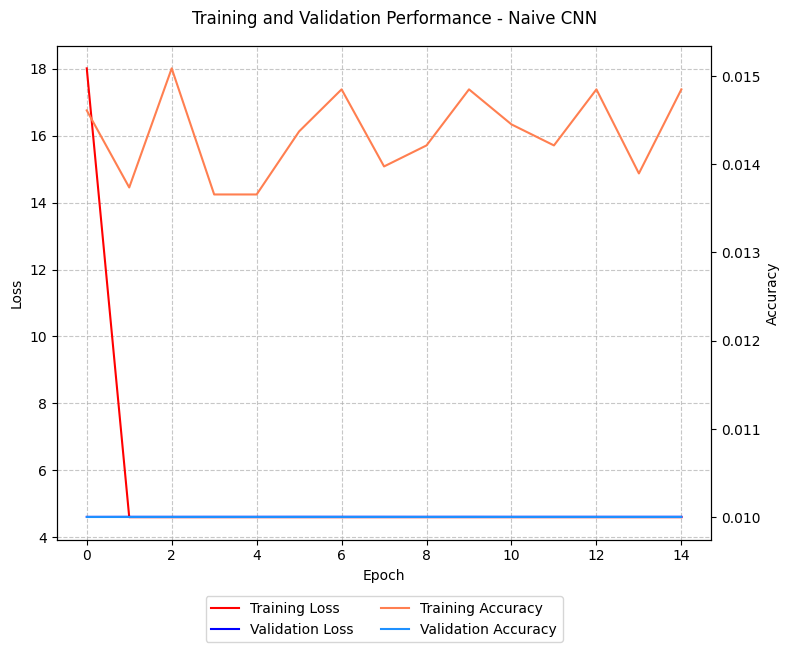

In [6]:
from scripts.makeplots import makeplots2, makeplots
makeplots2(losses_train_mynet, losses_valid_mynet, \
           accus_train_mynet, accus_valid_mynet, 'Naive CNN')

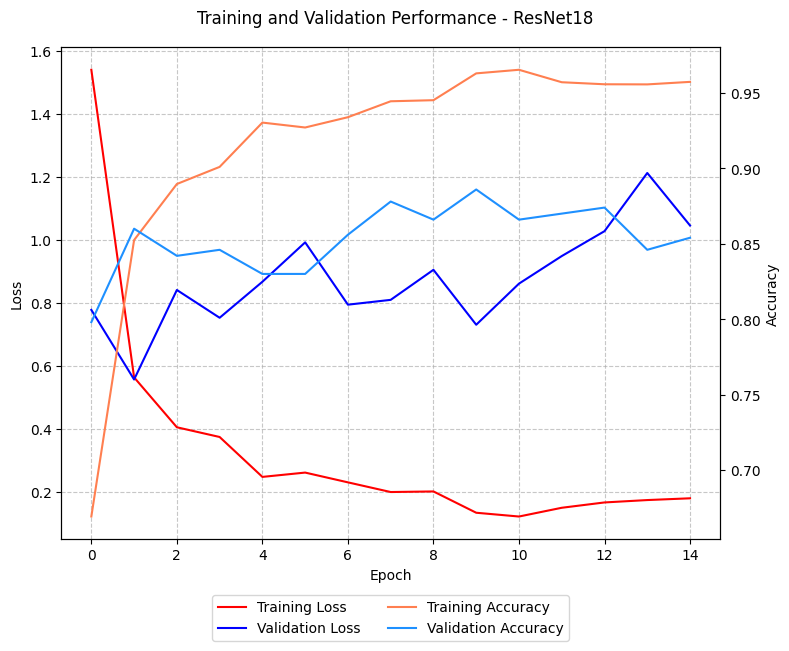

In [7]:
makeplots2(losses_train_resnet, losses_valid_resnet, \
           accus_train_resnet, accus_valid_resnet, 'ResNet18')

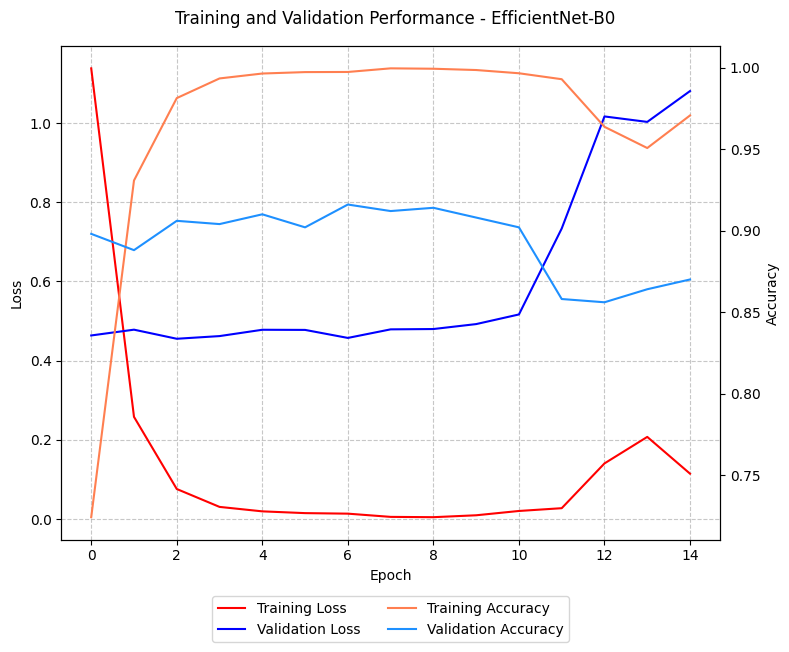

In [8]:
makeplots2(losses_train_effnet, losses_valid_effnet, \
           accus_train_effnet, accus_valid_effnet, 'EfficientNet-B0')